# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Evolution" data-toc-modified-id="Evolution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Evolution</a></div><div class="lev1 toc-item"><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Autocorrelation</a></div><div class="lev1 toc-item"><a href="#Mean" data-toc-modified-id="Mean-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mean</a></div><div class="lev1 toc-item"><a href="#Susceptibility" data-toc-modified-id="Susceptibility-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Susceptibility</a></div><div class="lev1 toc-item"><a href="#Finitse-size-scaling" data-toc-modified-id="Finitse-size-scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finitse-size scaling</a></div>

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '../script')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from fileoperations import ReadFile, SplitData
import os
import random as rand

In [2]:
data_dir = "../data/"

In [13]:
# Mac
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 20

In [116]:
#unfinished
def Bootstrap(n, data, func, *args):
    N = data.size
    rand.seed(600)
    values = []
    for i in range(0, n):
        new_data = []
        for i in range(0, N):
            new_data.append(data[rand.randint(0, N-1)])
        new_data = np.array(new_data, dtype=np.float64)
        values.append(func(new_data, *args))
    print(values)

# Evolution

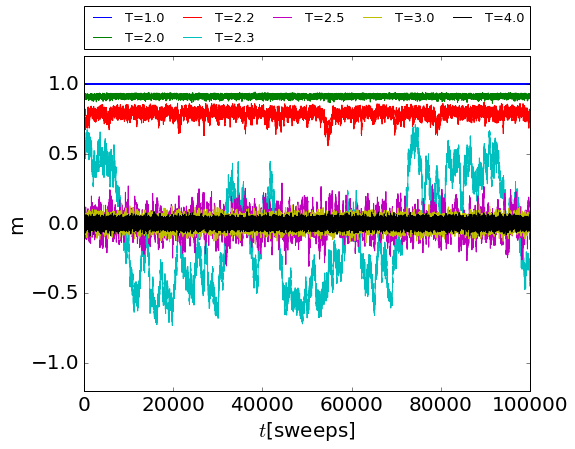

In [21]:
files = os.listdir(data_dir)
M_100_files = []
for element in files:
    if element[:5] == "M_100":
        M_100_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"m")
order = 0
for element in M_100_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax.plot(t, M/header["L"]**2, label="T=%.1f" % header["T"])


ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
ax.set_ylim(-1.2, 1.2)
plt.show()

{'T': 4.0, 'L': 100.0}


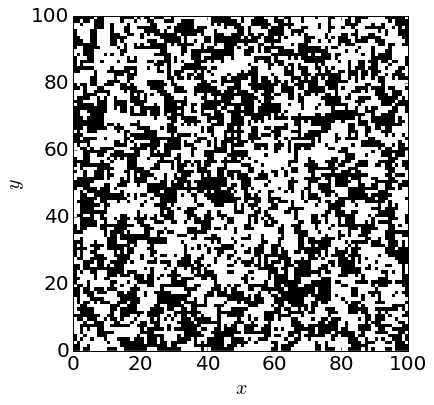

In [59]:
header, data = ReadFile(data_dir + "snap_100_4.000.dat", 1, " ")
print(header)
fig, ax = plt.subplots()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
cax = ax.imshow(data, extent=(0, 100, 0, 100), interpolation='none', 
                cmap=cm.Greys)
plt.show()

# Autocorrelation

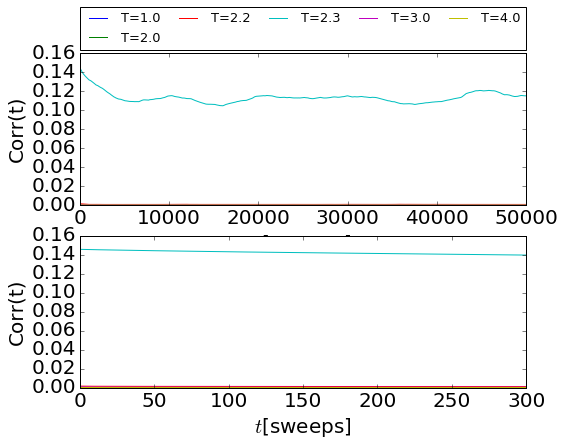

In [58]:
header, data = ReadFile(data_dir + "corr_100.dat", 1, " ")
data = SplitData(0, data)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xlabel(r"$t$[sweeps]")
ax1.set_ylabel(r"Corr(t)")
ax2.set_xlabel(r"$t$[sweeps]")
ax2.set_ylabel(r"Corr(t)")
for element in data:
    [t, T, M] = element
    T = T[0]
    m = M/(header['L']**2)
    m -= np.mean(m)
    m = np.abs(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax1.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.1f" % T)
    ax2.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.1f" % T)
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
ax2.set_xlim(0., 300.)
plt.show()

# Mean

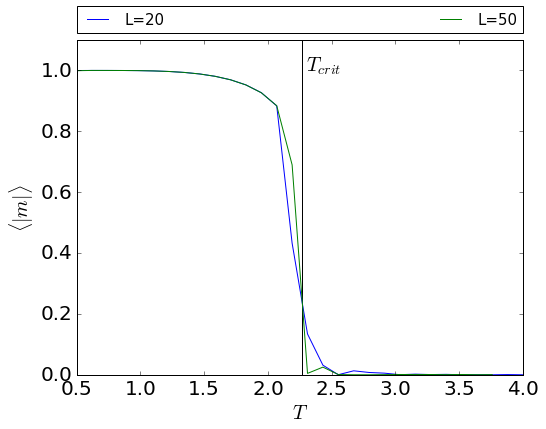

In [120]:
header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")

font = {'size': 20}

data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\langle\vert m \vert\rangle$")
ax.vlines(2.27, 0, 1.1)
ax.text(2.3, 1., r"$T_{crit}$", fontdict=font)
for element in data:
    L = element[0][0]
    m = np.abs(element[2])/L**2
    ax.plot(element[1], np.abs(element[2])/L**2, label="L=%d" %L)
ax.set_xlim(0.5, 4.)
ax.set_ylim(0., 1.1)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", 
          borderaxespad=0., fontsize="15")
plt.show()

# Susceptibility

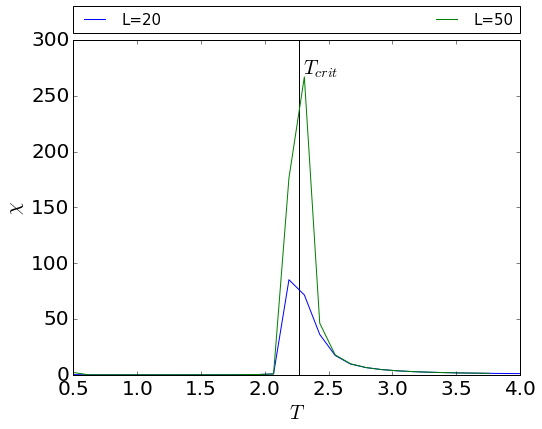

In [119]:
header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")

font = {'size': 20}

data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\chi$")
ax.vlines(2.27, 0, 300)
ax.text(2.3, 270, r"$T_{crit}$", fontdict=font)
for element in data:
    L = element[0][0]
    chi = element[3]/element[1]/L**2
    ax.plot(element[1], chi, label="L=%d" %L)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", 
          borderaxespad=0., fontsize="15")
plt.show()

# Finitse-size scaling

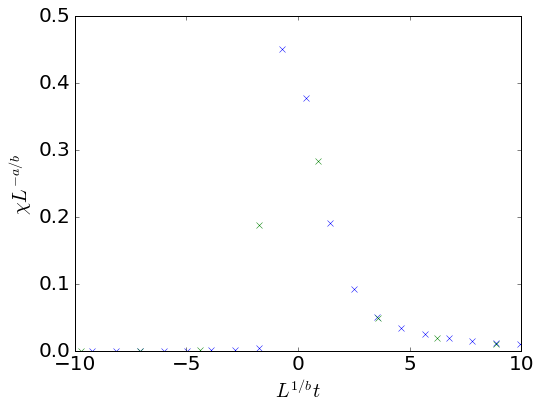

In [114]:
T_crit = 2.269
a = 7/4
b = 1

header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")
data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_ylabel(r"$\chi L^{-a/b}$")
ax.set_xlabel(r"$L^{1/b} t$")
for element in data:
    L = element[0][0]
    chi = element[3]/element[1]/L**2
    t = (element[1] - T_crit)/T_crit
    ax.plot(L**(1/b)*t ,chi*L**(-a/b), 'x')
ax.set_xlim(-10., 10.)
plt.show()